In [1]:
%load_ext autoreload
%autoreload

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms
import json

from IPython.display import display
from IPython.display import Markdown as md
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def f():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
def nf():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 4)
nf()
import warnings
warnings.filterwarnings('ignore')

def dp(df, r = 5, c = None):
    from IPython.display import display
    with pd.option_context('display.max_rows', 4, 'display.max_columns', None):
        display(df)

def fg(w = 6, h = 4, dpi = 120):
    plt.rcParams['figure.figsize'] = (w,h)
    plt.rcParams['figure.dpi'] = dpi
fg()

In [20]:
from libs.evaluation import Metrics

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
most_important_features = ['pay_amt1','pay_4','pay_0','pay_amt2']

In [5]:
df = pd.read_csv("data/UCI_Credit_Card.csv")

df.columns = df.columns.str.lower()

df = df.drop('id', axis = 1)

target_var = 'target'
df = df.rename(columns = {'default.payment.next.month':target_var})

df = df[[target_var]+most_important_features]

In [21]:
test_size = 0.3
X = df.drop(target_var, axis = 1)
y = df[target_var]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = test_size,
                                                    random_state = 42)

In [7]:
clf = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', max_depth = 3)

In [8]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

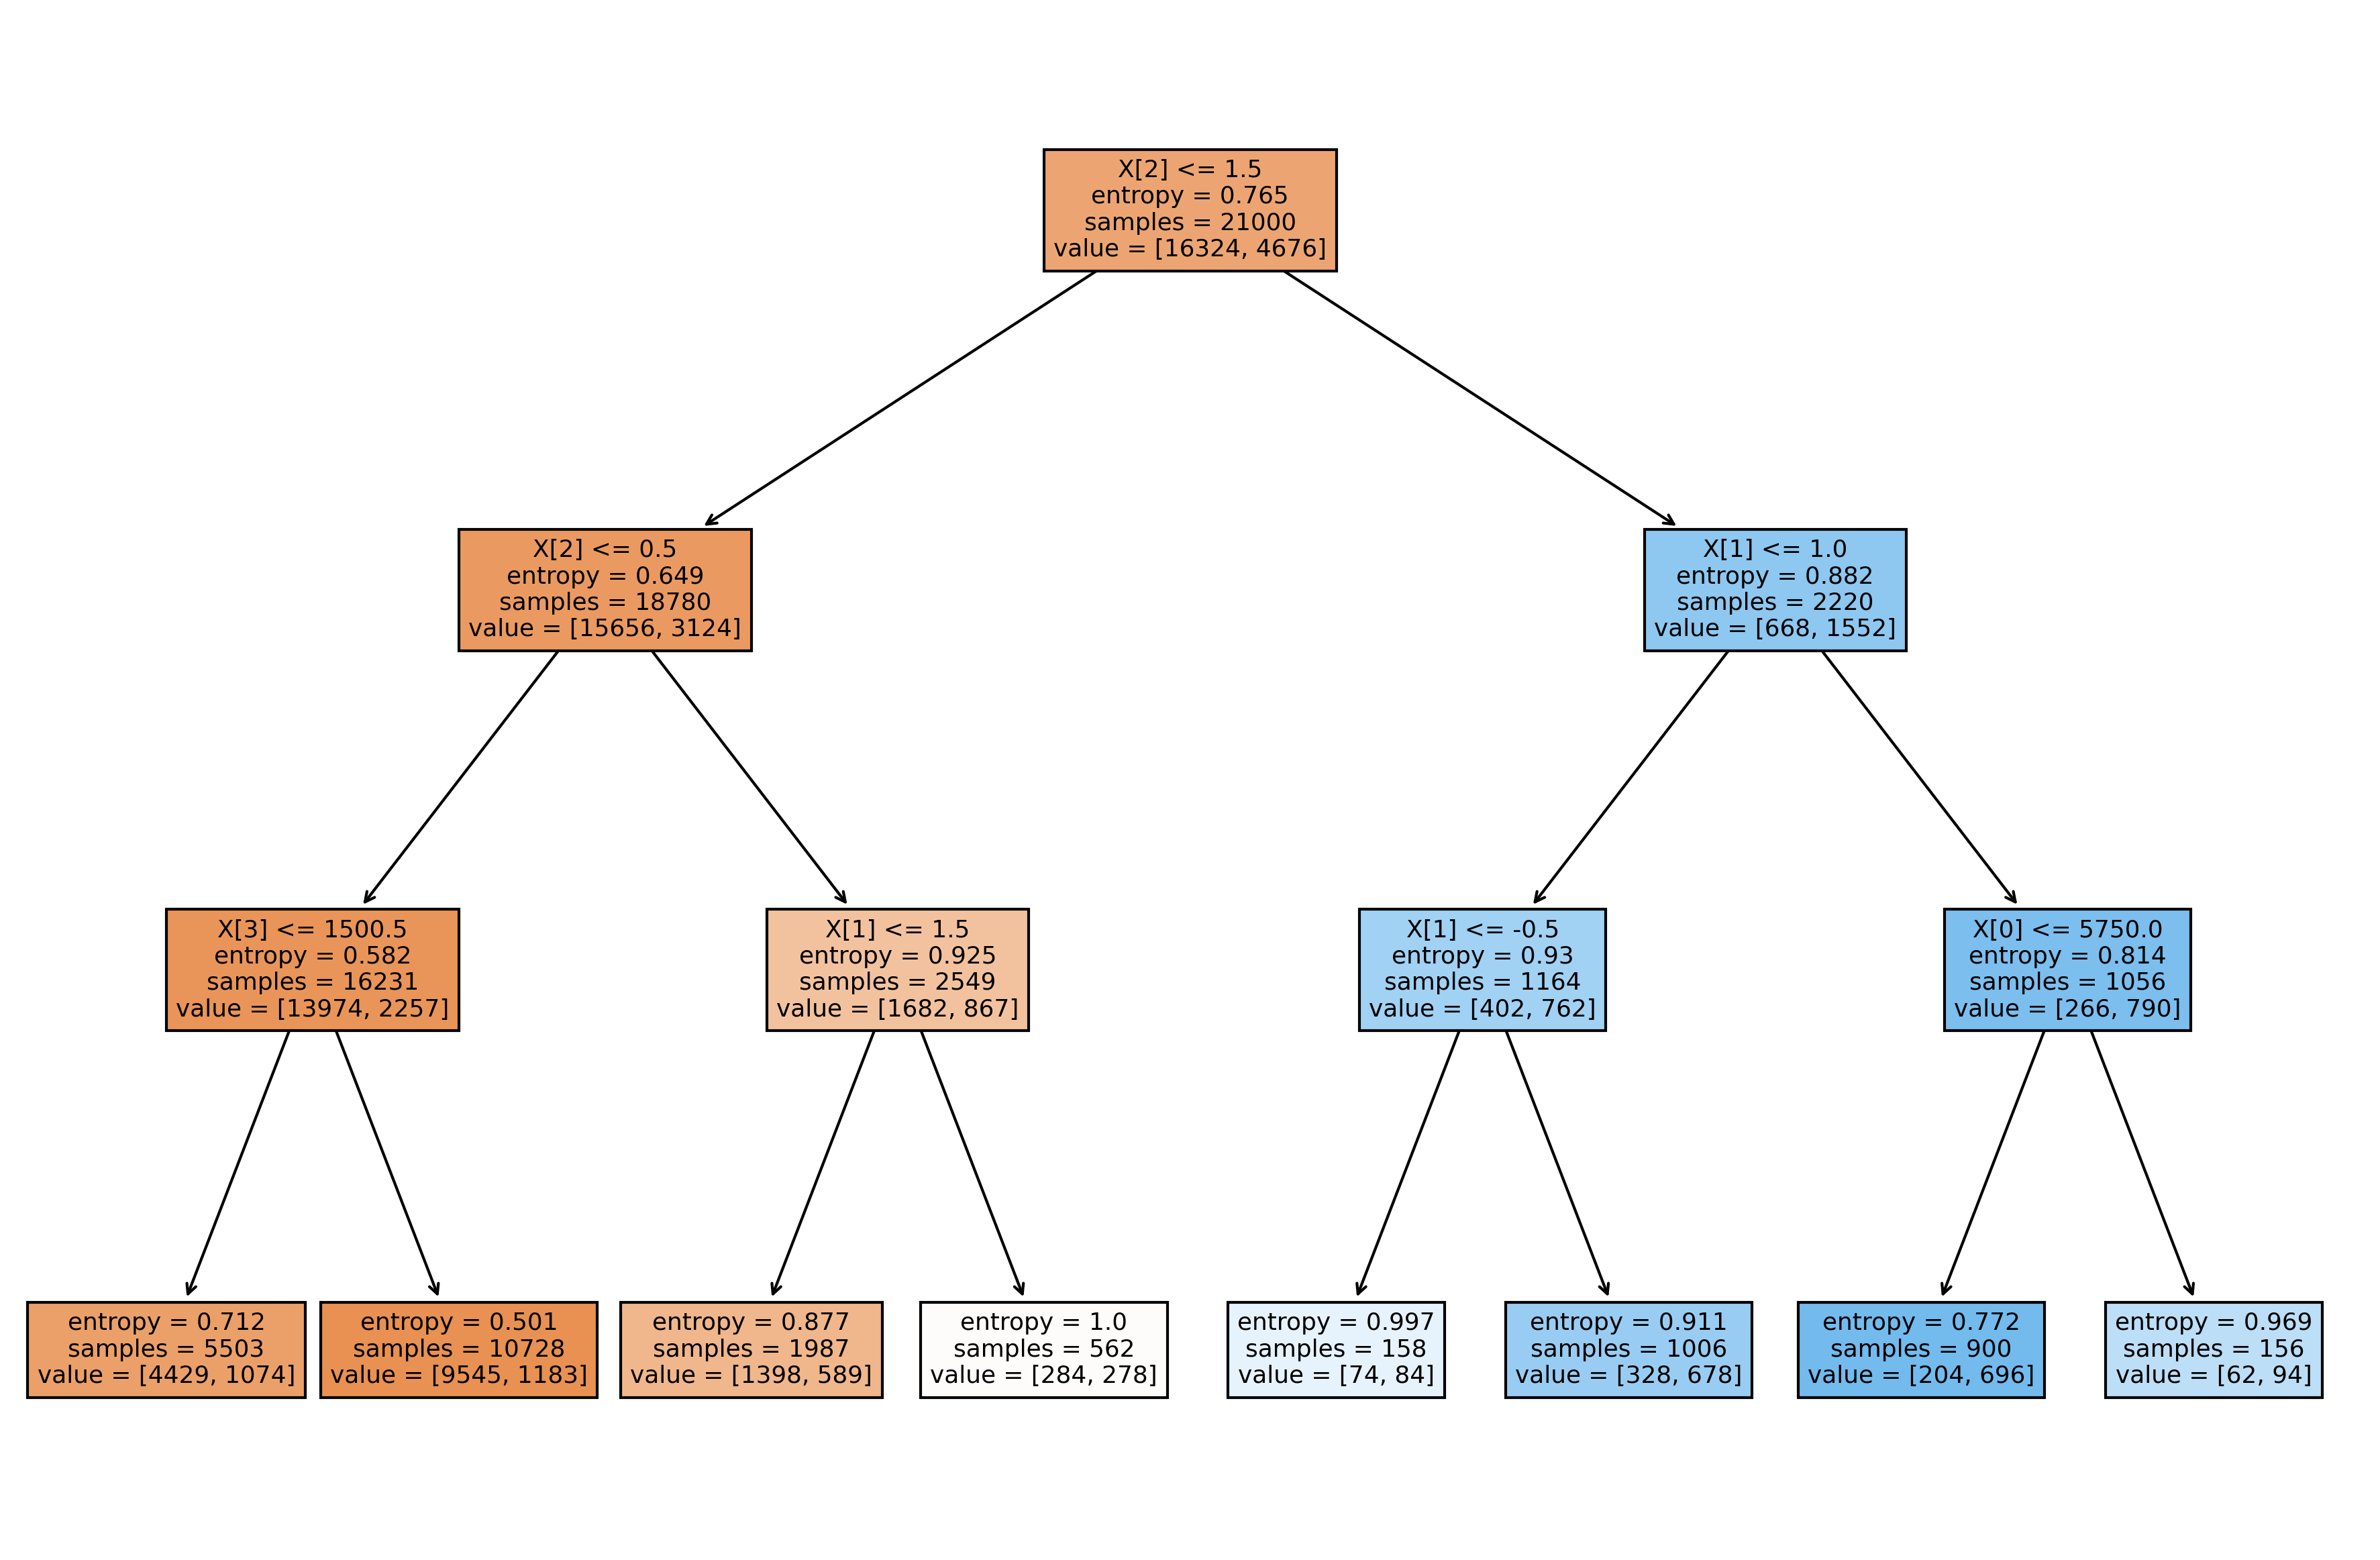

In [19]:
plt.figure(figsize = (15,10), dpi = 300);
plot_tree(clf,filled=True);
plt.savefig('tree.png',bbox_inches = "tight");

In [23]:
y_hat = clf.predict_proba(X_test)[:,1]

In [24]:
metrics = Metrics(y_test, y_hat)

In [25]:
metrics.scores

,accuracy,precision,recall,f1,auc,gini
0,0.82,0.69,0.32,0.44,0.73,0.46
